In [1]:
# COMP3330 Project 1A

# Group members: Lovekesh Singh: c, James McCulloch: 3291441, Jamey Blackman: c,
# Bradley De Domizio: c3305193, Aditya Jo: c, Hugh Masters: c

# Date: 10/05/2020
# Question: 1. a)


import csv
import tensorflow as tf
from numpy import arange, round, meshgrid, resize
import matplotlib.pyplot as plt


def read_two_spiral_file(filename="spiralsdataset.csv"):
    x = []
    y = []
    
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            x.append(list(map(float, row[:-1])))
            y.append([float(row[-1])])

    return x, y

x, y = read_two_spiral_file()

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
# Create the model
x_ = tf.placeholder(tf.float32, [None, 2])
y_ = tf.placeholder(tf.float32, [None, 1])

# Create first layer weights
layer_0_weights = tf.Variable(tf.random_normal([2, 40]))
layer_0_bias = tf.Variable(tf.random_normal([40]))
layer_0 = tf.nn.sigmoid(tf.add((tf.matmul(x_, layer_0_weights)), layer_0_bias))

# Create second layer weights
layer_1_weights = tf.Variable(tf.random_normal([40, 40]))
layer_1_bias = tf.Variable(tf.random_normal([40]))
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(layer_0, layer_1_weights), layer_1_bias))

# Create third layer weights
layer_2_weights = tf.Variable(tf.random_normal([40, 1]))
layer_2_bias = tf.Variable(tf.random_normal([1]))
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, layer_2_weights), layer_2_bias))

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.
Training...


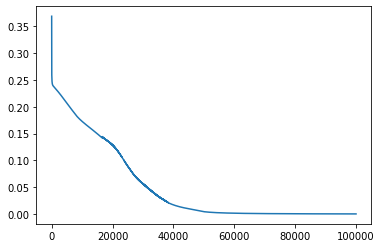

In [3]:
# Define error function
cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=y_, predictions=layer_2))

# .1 learning rate with 50000 epochs was good but worse than .5 learning rate

# .5 learning rate with 50000 epochs worked really well.
# .5 learning rate with 30000 epochs worked decently.

# 1 learning rate with 50000 epochs seemed to result in overtraining
# 1 learning rate with 80000 epochs seemed to result in even more overtraining
# 1 learning rate with 20000 epochs seemed about as good as the others
# 1 learning rate with 10000 epochs seemed ok.

# Define optimizer and its task (minimise error function)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.5).minimize(cost)

N_EPOCHS = 100000

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

print('Training...')

errors = []

# Train
for i in range(N_EPOCHS):
    _, error = sess.run([optimizer,cost], feed_dict={x_: x, y_: y})
    errors.append(error)
    
plt.plot(errors)
plt.show()       

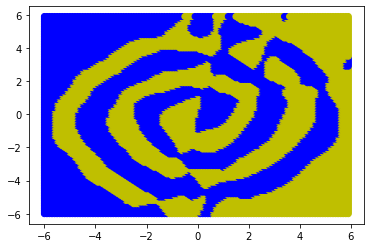

In [4]:
# Visualise activations
activation_range = arange(-6,6,0.1) # interval of [-6,6) with step size 0.1
coordinates = [(x,y) for x in activation_range for y in activation_range]
classifications = round(sess.run(layer_2, feed_dict={x_:coordinates}))
x, y = meshgrid(activation_range, activation_range)
plt.scatter(x, y, c=['b' if x > 0 else 'y' for x in classifications])
plt.show()